# Elliptic Function VCVS Filter {#sec-elliptic-function}

## Abstract {.unnumbered}


## Introduction

![Schematic](Elliptic-function-VCVS-LPF.png)


## Circuit description


The circuit shown below is an elliptic function VCVS filter, which contains zeros and poles. The filter cutoff is 100 Hz. The circuit is from @Williams1995, example 3-13.



This is the modified net list, V4 line was changed. The lines for the inductors were also changed.
```
* Elliptic function VCVS LPF
R3 3 0 4750
R4 5 0 73.2e3
R1 4 1 9530
R2 5 4 9530
R7 2 7 10e3
C1 3 1 0.05e-6
C2 5 3 0.05e-6
C3 7 4 0.1e-6
C4 5 0 0.22e-6
C5 2 0 0.18e-6
O1 6 5 7
V1 1 0 1
R5 6 0 10e3
R6 7 6 44.2e3

```

This netlist is read into the Symbolic Modified Nodal Analysis Jupyter notebook and the following circuit equations were generated.  

$- C_{1} s v_{3} + I_{V1} + v_{1} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{4}}{R_{1}} = 0$  
$v_{2} \left(C_{5} s + \frac{1}{R_{7}}\right) - \frac{v_{7}}{R_{7}} = 0$  
$- C_{1} s v_{1} - C_{2} s v_{5} + v_{3} \left(C_{1} s + C_{2} s + \frac{1}{R_{3}}\right) = 0$  
$- C_{3} s v_{7} + v_{4} \left(C_{3} s + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{5}}{R_{2}} - \frac{v_{1}}{R_{1}} = 0$  
$- C_{2} s v_{3} + v_{5} \left(C_{2} s + C_{4} s + \frac{1}{R_{4}} + \frac{1}{R_{2}}\right) - \frac{v_{4}}{R_{2}} = 0$  
$v_{6} \cdot \left(\frac{1}{R_{6}} + \frac{1}{R_{5}}\right) - \frac{v_{7}}{R_{6}} = 0$  
$- C_{3} s v_{4} + I_{O} + v_{7} \left(C_{3} s + \frac{1}{R_{7}} + \frac{1}{R_{6}}\right) - \frac{v_{2}}{R_{7}} - \frac{v_{6}}{R_{6}} = 0$  
$v_{1} = V_{1}$  
$- v_{5} + v_{6} = 0$  


In [1]:
import os
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
init_printing()

Copy the text strings generated by the Symbolic Modified Nodal Analysis Jupyter notebook to the cell below. used in nodal analysis

In [2]:
C1, v4, v1, V1, R7, v5, R4, R3, R2, v2, C4, C2, s, R1, C5, I_O1, v3, I_V1, v7, C3, R6, v6, R5 = symbols(' C1  v4  v1  V1  R7  v5  R4  R3  R2  v2  C4  C2  s  R1  C5  I_O1  v3  I_V1  v7  C3  R6  v6  R5 ')
A = Matrix([[C1*s + 1/R1, 0, -C1*s, -1/R1, 0, 0, 0, 1, 0], [0, C5*s + 1/R7, 0, 0, 0, 0, -1/R7, 0, 0], [-C1*s, 0, C1*s + C2*s + 1/R3, 0, -C2*s, 0, 0, 0, 0], [-1/R1, 0, 0, C3*s + 1/R2 + 1/R1, -1/R2, 0, -C3*s, 0, 0], [0, 0, -C2*s, -1/R2, C2*s + C4*s + 1/R4 + 1/R2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1/R6 + 1/R5, -1/R6, 0, 0], [0, -1/R7, 0, -C3*s, 0, -1/R6, C3*s + 1/R7 + 1/R6, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, -1, 1, 0, 0, 0]])
X = Matrix( [v1, v2, v3, v4, v5, v6, v7, I_V1, I_O1] )
Z = Matrix( [0, 0, 0, 0, 0, 0, 0, V1, 0] )

equ = Eq(A*X,Z)
equ

⎡                          ⎛       1 ⎞   v₄     ⎤       
⎢     -C₁⋅s⋅v₃ + I_V1 + v₁⋅⎜C₁⋅s + ──⎟ - ──     ⎥       
⎢                          ⎝       R₁⎠   R₁     ⎥       
⎢                                               ⎥       
⎢                 ⎛       1 ⎞   v₇              ⎥       
⎢              v₂⋅⎜C₅⋅s + ──⎟ - ──              ⎥       
⎢                 ⎝       R₇⎠   R₇              ⎥       
⎢                                               ⎥   ⎡0 ⎤
⎢                          ⎛              1 ⎞   ⎥   ⎢  ⎥
⎢  -C₁⋅s⋅v₁ - C₂⋅s⋅v₅ + v₃⋅⎜C₁⋅s + C₂⋅s + ──⎟   ⎥   ⎢0 ⎥
⎢                          ⎝              R₃⎠   ⎥   ⎢  ⎥
⎢                                               ⎥   ⎢0 ⎥
⎢                 ⎛       1    1 ⎞   v₅   v₁    ⎥   ⎢  ⎥
⎢   -C₃⋅s⋅v₇ + v₄⋅⎜C₃⋅s + ── + ──⎟ - ── - ──    ⎥   ⎢0 ⎥
⎢                 ⎝       R₂   R₁⎠   R₂   R₁    ⎥   ⎢  ⎥
⎢                                               ⎥ = ⎢0 ⎥
⎢                ⎛              1    1 ⎞   v₄   ⎥   ⎢  ⎥
⎢  -C₂⋅s⋅v₃ + v₅⋅⎜C₂⋅s + C₄⋅s +

## Symbolic solution
took about 2hrs

## Numeric solution

In [3]:
# enter the element values, set I2=0
equ1a = equ.subs({
    V1:1.0000e+00,
    R3:4.7500e+03,
    R4:7.3200e+04,
    R1:9.5300e+03,
    R2:9.5300e+03,
    R7:1.0000e+04,
    C1:5.0000e-08,
    C2:5.0000e-08,
    C3:1.0000e-07,
    C4:2.2000e-07,
    C5:1.8000e-07,
    R5:1.0000e+04,
    R6:4.4200e+04})    

equ1a  # display the equations

⎡          I_V1 - 5.0e-8⋅s⋅v₃ + v₁⋅(5.0e-8⋅s + 0.000104931794333683) - 0.00010
⎢                                                                             
⎢                                  v₂⋅(1.8e-7⋅s + 0.0001) - 0.0001⋅v₇         
⎢                                                                             
⎢                   -5.0e-8⋅s⋅v₁ - 5.0e-8⋅s⋅v₅ + v₃⋅(1.0e-7⋅s + 0.000210526315
⎢                                                                             
⎢-1.0e-7⋅s⋅v₇ - 0.000104931794333683⋅v₁ + v₄⋅(1.0e-7⋅s + 0.000209863588667366)
⎢                                                                             
⎢             -5.0e-8⋅s⋅v₃ - 0.000104931794333683⋅v₄ + v₅⋅(2.7e-7⋅s + 0.000118
⎢                                                                             
⎢                            0.00012262443438914⋅v₆ - 2.26244343891403e-5⋅v₇  
⎢                                                                             
⎢     I_O1 - 1.0e-7⋅s⋅v₄ - 0.0001⋅v₂ - 2.26244343891

In [4]:
u1 = solve(equ1a,X)
#u1

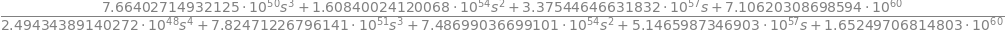

In [5]:
u1[v2]

## AC analysis
Solve equations for $\omega$ equal to 1 radian per second, s = 1j.

In [6]:
equ1a_1rad_per_s = equ1a.subs({s:1j})
equ1a_1rad_per_s  # display the equations

⎡          I_V1 + v₁⋅(0.000104931794333683 + 5.0e-8⋅ⅈ) - 5.0e-8⋅ⅈ⋅v₃ - 0.00010
⎢                                                                             
⎢                                  v₂⋅(0.0001 + 1.8e-7⋅ⅈ) - 0.0001⋅v₇         
⎢                                                                             
⎢                   -5.0e-8⋅ⅈ⋅v₁ + v₃⋅(0.000210526315789474 + 1.0e-7⋅ⅈ) - 5.0e
⎢                                                                             
⎢-0.000104931794333683⋅v₁ + v₄⋅(0.000209863588667366 + 1.0e-7⋅ⅈ) - 0.000104931
⎢                                                                             
⎢             -5.0e-8⋅ⅈ⋅v₃ - 0.000104931794333683⋅v₄ + v₅⋅(0.00011859299651947
⎢                                                                             
⎢                            0.00012262443438914⋅v₆ - 2.26244343891403e-5⋅v₇  
⎢                                                                             
⎢     I_O1 - 0.0001⋅v₂ - 1.0e-7⋅ⅈ⋅v₄ - 2.26244343891

In [7]:
ans1 = solve(equ1a_1rad_per_s,X)
ans1

In [8]:
for name, value in ans1.items():
    print('{:5s}: mag: {:10.6f} phase: {:11.5f} deg'.format(str(name),float(abs(value)),float(arg(value)*180/np.pi)))

v1   : mag:   1.000000 phase:     0.00000 deg
v2   : mag:   4.300280 phase:    -0.15123 deg
v3   : mag:   0.000426 phase:    89.95151 deg
v4   : mag:   0.896709 phase:     0.08235 deg
v5   : mag:   0.793411 phase:    -0.04810 deg
v6   : mag:   0.793411 phase:    -0.04810 deg
v7   : mag:   4.300287 phase:    -0.04810 deg
I_V1 : mag:   0.000011 phase:   179.54943 deg
I_O1 : mag:   0.000079 phase:  -179.24340 deg


The following results were obtained from LTSpice.  
```
       --- AC Analysis ---


```
The LTSpice results are the same.

## AC Sweep
Looking at node 5 voltage and comparing the results with those obtained from LTSpice. Thr frequency sweep is from 0.01 Hz to 1 Hz.

Load the csv file of node 5 voltage over the sweep range and plot along with the results obtained from SymPy.

## AC Sweep
Looking at node 2 voltage.

In [9]:
v4, I_F1, I_Ea1, v1, v2, v5, I_L1, v3, I_V1, I_V2 = symbols(' v4 I_F1 I_Ea1 v1 v2 v5 I_L1 v3 I_V1 I_V2')

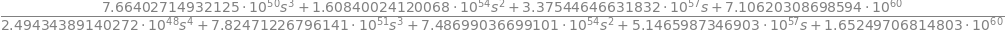

In [10]:
H = u1[v2]
H

In [11]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b) # system for circuit 1

In [12]:
x = np.logspace(1, 3, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

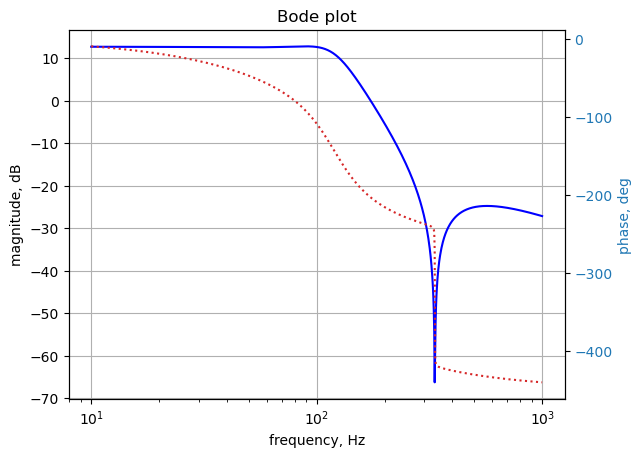

In [13]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Bode plot')
plt.show()